In [5]:
#%pip install seaborn 
#%pip install scikit-learn
#pip install plotly
#pip install --upgrade nbformat

In [6]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
# import oil.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype


oil=pd.read_csv('oil.csv', parse_dates=['date'])

oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [8]:
# rename column 'dcoilwtico' to oil_price in oil.csv

oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [9]:
# import holidays_events.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

holidays_eve=pd.read_csv('holidays_events.csv', parse_dates=['date'])
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [10]:
# import stores.csv with a pd.read_csv
# and display columns, Non-Null, and datatype with .info()


stores=pd.read_csv('stores.csv')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [11]:
# import transactions.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

transactions=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\transactions.csv', parse_dates=['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [12]:
# import test.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

test=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\test.csv', parse_dates=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [13]:
# import train.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

train=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\train.csv', parse_dates=['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


# Date ranges
Check date ranges of imported datasets

In [14]:
# check range of dates for oil.csv

oil['date'].min(), oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [15]:
# check range of dates for test.csv

test['date'].min(), test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [16]:
# check range of dates for train.csv

train['date'].min(), train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [18]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

oil_test_start_date= '2017-08-16'
oil_test_end_date= '2017-08-31'

oil_train = oil[oil['date'] < oil_test_start_date]
oil_test = oil[oil['date'].between (oil_test_start_date, oil_test_end_date)]

# Verify the split
range_oil_test = oil_test['date'].min(), oil_test['date'].max()
range_oil_train = oil_train['date'].min(), oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)


(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [19]:
# merge test and oil_test on 'date'

merged_test = pd.merge(oil_test, test, on='date', how='inner')
print(merged_test.head())

        date  oil_prices       id  store_nbr      family  onpromotion
0 2017-08-16   46.799999  3000888          1  AUTOMOTIVE            0
1 2017-08-16   46.799999  3000889          1   BABY CARE            0
2 2017-08-16   46.799999  3000890          1      BEAUTY            2
3 2017-08-16   46.799999  3000891          1   BEVERAGES           20
4 2017-08-16   46.799999  3000892          1       BOOKS            0


In [36]:
#check for null or missing values

merged_test.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [20]:
oil.isnull().sum()

date           0
oil_prices    43
dtype: int64

<Axes: >

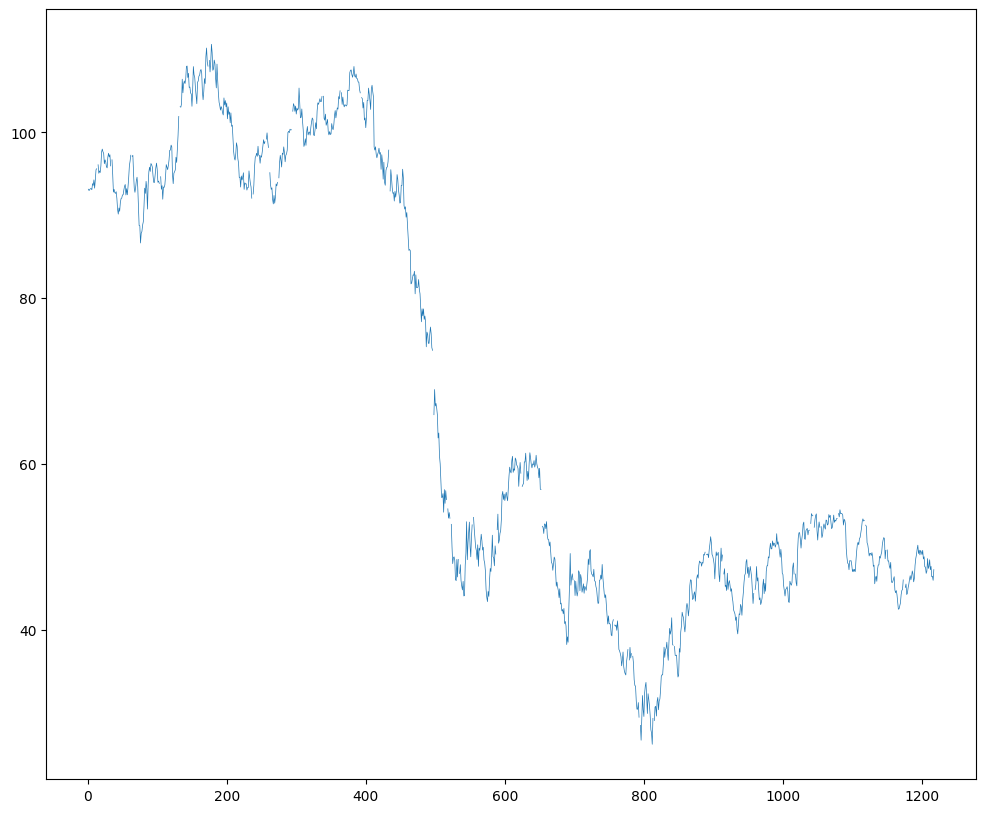

In [51]:
# visualize oil.csv

plt.figure(figsize=(12,10))
oil['oil_prices'].plot(linewidth=0.5)


In [58]:
#visualize oil prices with a date slider for close observation

fig = px.line(oil,x='date', y='oil_prices', title='World crude oil prices')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [37]:
# check for null values of the oil_train dataset

oil_train.isnull().sum()

date           0
oil_prices    43
dtype: int64

In [38]:
# Interpolate missing values using linear interpolation
# interpolation method used to capture local trends because there were few missing values within a relatively stable trend

oil_train_interpolated = oil_train.interpolate(method='linear')

In [39]:
# check missing values

oil_train_interpolated.isnull().sum()

date          0
oil_prices    1
dtype: int64

In [69]:
#check rows with missing values
#oil_train_interpolated.query('oil_prices != oil_prices')

In [47]:
# back fill missing data at the beginning of dataset 
# check if missing data is filled

oil_train_interpolated['oil_prices'].fillna(method='bfill', inplace=True)
oil_train_interpolated.isnull().sum()

date          0
oil_prices    0
dtype: int64

In [48]:
# merge train and oil_train_interpolated datasets
# print merged dataset to see if successfull

merged_train = pd.merge(oil_train_interpolated, train, on='date', how='inner')
print(merged_train.head())

        date  oil_prices  id  store_nbr      family  sales  onpromotion
0 2013-01-01   93.139999   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   93.139999   1          1   BABY CARE    0.0            0
2 2013-01-01   93.139999   2          1      BEAUTY    0.0            0
3 2013-01-01   93.139999   3          1   BEVERAGES    0.0            0
4 2013-01-01   93.139999   4          1       BOOKS    0.0            0


In [49]:
# check for missing values in merged dataset

merged_train.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [59]:
#look at missing rows in merged_train

#merged_train.query('oil_prices != oil_prices')

In [55]:
# inspect merged train

merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143746 entries, 0 to 2143745
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 114.5+ MB


In [60]:
# check the shape of merged_train

merged_train.shape

(2143746, 7)

In [62]:
#display random sample of 5 rows
#oil.sample(5, random_state = 0)

In [16]:
# Get a specific month
# this gives the year and the whole month, from the begining to the end of month

# oil.loc['2013-01']

In [78]:
# join transactions and stores on 'store_nbr'

merged_transactions_store = pd.merge(transactions, stores, on='store_nbr', how='inner')
print(merged_transactions_store.head())


        date  store_nbr  transactions     city        state type  cluster
0 2013-01-01         25           770  Salinas  Santa Elena    D        1
1 2013-01-02         25          1038  Salinas  Santa Elena    D        1
2 2013-01-03         25           887  Salinas  Santa Elena    D        1
3 2013-01-04         25          1054  Salinas  Santa Elena    D        1
4 2013-01-05         25          1355  Salinas  Santa Elena    D        1


In [81]:
# check shape

merged_transactions_store.shape

(83488, 7)

In [111]:
merged_transactions_store['date'].nunique()

1682

In [112]:
train['date'].nunique()

1684

In [113]:
test['date'].nunique()

16

In [116]:
holidays_eve['date'].min(), holidays_eve['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [119]:
# check range of merged_transactions_store

range_merged_transaction_store = merged_transactions_store['date'].min(), merged_transactions_store['date'].max()
print('range of merged transaction',range_merged_transaction_store)
print('range of oil_test:',range_oil_test)
print('range of oil_train:',range_oil_train)


range of merged transaction (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))
range of oil_test: (Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
range of oil_train: (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [107]:
merged_transactions_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   city          83488 non-null  object        
 4   state         83488 non-null  object        
 5   type          83488 non-null  object        
 6   cluster       83488 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.5+ MB


In [ ]:
# Stationarity test

#Hypothesis
# Null Hypothesis: Series is not Stationary
# Alternate Hypothesis: Series is stationary

#KPSS test
#
#stats, p, lags, critical_values=kpss(df["Sales"],'ct')
#print(f'Test Statistics:{stats}')
#print(f'p-value:{p}')
#print(f'Critical Values:{critical_values}')

# if p<0.05:
    #print('Series is not stationary')
# else:
#   print('Series is stationary')

#Augumented Dickey Fuller (ADF) test

# result = adfuller(df['Sales'])
#print(f'Test Statistics:{result[0]}')
#print(f'p-value:{result[1]}')
#print(f'Critical Values:{result[4]}')

#if result[1]<0.05:
#   print('Series is not stationary')
#else:
#   print('Series is stationary')